# Pythonで理解するディープラーニング入門
xPython講演サンプルnotebook

In [1]:
# 必要ライブラリの宣言
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 学習データの設定 (numpy二次元配列)
data = np.array([[166,58.7], [176,75.7], 
  [171,62.1], [173,70.4], [169,60.1]])

# データの確認
print(data)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


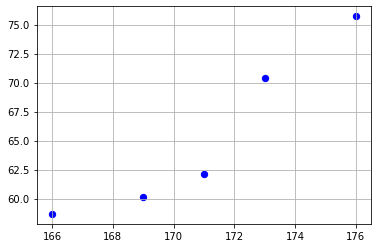

In [3]:
# 散布図で表示 (図)
plt.scatter(data[:,0], data[:,1], s=40, c='b')
plt.grid()
plt.show()

In [4]:
# 身長、体重の平均値の計算
mean = data.mean(axis=0)
print(mean)

[171.   65.4]


In [5]:
mean2 = data.mean(axis=1)
print(mean2)

[112.35 125.85 116.55 121.7  114.55]


In [6]:
# 元データの平行移動
data1 = data - mean
print(data1)

[[-5.  -6.7]
 [ 5.  10.3]
 [ 0.  -3.3]
 [ 2.   5. ]
 [-2.  -5.3]]


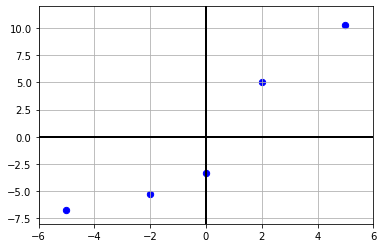

In [7]:
# 平行移動後の散布図表示 (図1-8)
plt.scatter(data1[:,0], data1[:,1], s=40, c='b')
plt.plot([-6,6],[0,0], lw=2, c='k')
plt.plot([0,0],[-8,12],lw=2,c='k')
plt.xlim(-6,6)
plt.ylim(-8,12)
plt.grid()
plt.show()

In [8]:
# 入力データの抽出
# ダミー変数追加のため、
# 1次元でなく5x1の2次元データにします。
x1 = data1[:,0:1]
print(x1)
print(x1.shape)

[[-5.]
 [ 5.]
 [ 0.]
 [ 2.]
 [-2.]]
(5, 1)


In [9]:
# ダミー変数を追加
x = np.insert(x1, 0, 1.0, axis=1)
print('ダミー変数追加後')
print(x)
print(x.shape)

ダミー変数追加後
[[ 1. -5.]
 [ 1.  5.]
 [ 1.  0.]
 [ 1.  2.]
 [ 1. -2.]]
(5, 2)


In [10]:
# 正解データ
yt = data1[:,1]
print(yt)

[-6.7 10.3 -3.3  5.  -5.3]


In [11]:
# 予測関数 (1, x)の値から予測値ypを計算する
def pred(x, w):
    return(x @ w)

In [12]:
# 重みベクトルの初期値 (勝手な値を設定)
w = np.array([2, -1])
yp = pred(x, w)
print(yp)

[ 7. -3.  2.  0.  4.]


In [13]:
# 損失関数の計算
yd = yp - yt
L = np.mean(yd ** 2) / 2
print(L)

50.41600000000001


In [14]:
# 初期化処理

# データ系列総数 (=5)
M  = x.shape[0]

# 入力データ次元数(ダミー変数を含む) (=2)
D = x.shape[1]

# 繰り返し回数
iters = 200

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (勝手な値を設定)
w = np.array([2, -1])

# 評価結果記録用 (損失関数値, w0, w1を記録)
history = np.zeros((0,4))

In [15]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算
    yp = pred(x, w)
    
    # 誤差の計算
    yd = yp - yt
    
    # 勾配降下法の実装
    w = w - alpha * (x.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存

    # 重みベクトル値の取得
    w0 = float(w[0])
    w1 = float(w[1])

    # 損失関数値の計算
    L = np.mean(yd ** 2) / 2
    
    # 計算結果の記録
    line = np.array([k, L, w0, w1])
    history = np.vstack((history, line))
    
    # 画面表示
    print( "iter = %d  L = %f w0 = %f w1 = %f" 
          % (k, L, w0, w1))

iter = 0  L = 50.416000 w0 = 1.980000 w1 = -0.672800
iter = 1  L = 40.291163 w0 = 1.960200 w1 = -0.383555
iter = 2  L = 32.371142 w0 = 1.940598 w1 = -0.127863
iter = 3  L = 26.174246 w0 = 1.921192 w1 = 0.098169
iter = 4  L = 21.324050 w0 = 1.901980 w1 = 0.297982
iter = 5  L = 17.526391 w0 = 1.882960 w1 = 0.474616
iter = 6  L = 14.551393 w0 = 1.864131 w1 = 0.630760
iter = 7  L = 12.219413 w0 = 1.845489 w1 = 0.768792
iter = 8  L = 10.390065 w0 = 1.827034 w1 = 0.890812
iter = 9  L = 8.953642 w0 = 1.808764 w1 = 0.998678
iter = 10  L = 7.824409 w0 = 1.790677 w1 = 1.094031
iter = 11  L = 6.935365 w0 = 1.772770 w1 = 1.178324
iter = 12  L = 6.234151 w0 = 1.755042 w1 = 1.252838
iter = 13  L = 5.679844 w0 = 1.737492 w1 = 1.318709
iter = 14  L = 5.240467 w0 = 1.720117 w1 = 1.376939
iter = 15  L = 4.891024 w0 = 1.702916 w1 = 1.428414
iter = 16  L = 4.611984 w0 = 1.685886 w1 = 1.473918
iter = 17  L = 4.388078 w0 = 1.669028 w1 = 1.514143
iter = 18  L = 4.207373 w0 = 1.652337 w1 = 1.549703
iter = 19 

iter = 196  L = 2.308424 w0 = 0.276162 w1 = 1.820690
iter = 197  L = 2.307650 w0 = 0.273400 w1 = 1.820690
iter = 198  L = 2.306891 w0 = 0.270666 w1 = 1.820690
iter = 199  L = 2.306147 w0 = 0.267959 w1 = 1.820690


In [16]:
np.set_printoptions(precision=3)
yp = pred(x, w)
print('最終的な予測値')
print(yp)
print('正解値')
print(yt)

最終的な予測値
[-8.835  9.371  0.268  3.909 -3.373]
正解値
[-6.7 10.3 -3.3  5.  -5.3]


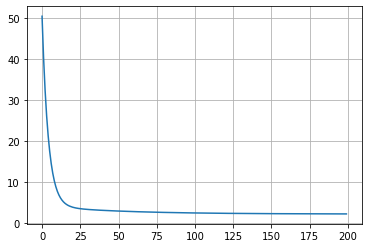

In [17]:
# 学習曲線の表示
plt.plot(history[:,0], history[:,1])
plt.grid()
plt.show()

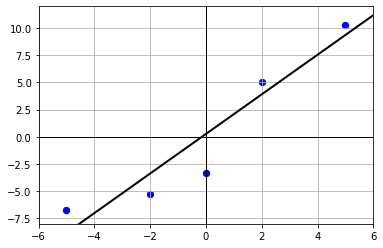

In [18]:
# 散布図と回帰直線を同時表示

X = np.array([[1, -6],[1, 6]])
Y = pred(X, w)

plt.scatter(data1[:,0], data1[:,1], s=40, c='b')
plt.plot([-6, 6], Y, lw=2, c='k')
plt.plot([-6,6],[0,0], lw=1, c='k')
plt.plot([0,0],[-8,12],lw=1,c='k')
plt.xlim(-6,6)
plt.ylim(-8,12)
plt.grid()
plt.show()

In [19]:
# Scikit-learnのライブラリを使って線形回帰モデルを作成

from sklearn import linear_model
clf = linear_model.LinearRegression()

# 予測モデルを作成
clf.fit(x1, yt)

# 切片と傾きの取得
W0 = clf.intercept_
W1 = clf.coef_
print('パラメータ値比較')
print('実習で求めた結果 w0 = %6.2f w1 = %6.2f' % (w0, w1))
print('ライブラリの結果 w0 = %6.2f w1 = %6.2f' % (W0, W1))

パラメータ値比較
実習で求めた結果 w0 =   0.27 w1 =   1.82
ライブラリの結果 w0 =  -0.00 w1 =   1.82
